In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
import scipy.stats as stats
from scipy.optimize import curve_fit

%matplotlib inline


# Problem 3

In [2]:
def rolldice(rolls):
    scores = []
    for i in range(rolls):
        scores.append(np.random.randint(1,7))
    
    return np.array(scores)

In [3]:
test = rolldice(1000)
bins = np.arange(1,8) - 0.5

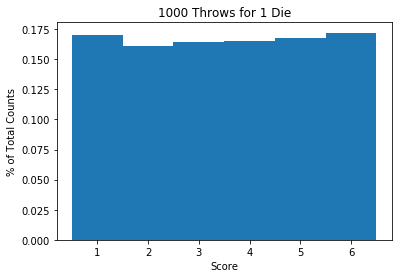

Numerical Mean = 3.516
Numerical Standard deviation = 1.7203906533110438


In [4]:
plt.figure()
plt.title('1000 Throws for 1 Die')
plt.xlabel('Score')
plt.ylabel('% of Total Counts')
plt.hist(test, bins, density = True)
plt.show()

# 1000 throws of 1 die
mean = np.mean(test)
stdev = np.std(test)
print('Numerical Mean =', mean)
print('Numerical Standard deviation =', stdev)

In [5]:
# analytical mean
amean = (1 + 2 + 3 + 4 + 5 + 6)/6

# analytical stdev
total = 0
for i in range(1,7):
    sqdiff = (i - amean)**2
    total += sqdiff

astdev = np.sqrt(total/(6))
    
print('Analytical Mean = ', amean)
print('Analytical Standard deviation =', astdev)

Analytical Mean =  3.5
Analytical Standard deviation = 1.707825127659933


In [6]:
# multiple die per throw:
def multithrow(rolls, N = 1):
    scores = []
    #values = np.arange(1,7)
    
    for i in range(rolls):
        total = 0
        for j in range(N):
            total += np.random.randint(1,7)
        scores.append(total)
    
    bins = np.arange(N*1, (N*7)) - 0.5
    mean = np.mean(scores)
    stdev = np.std(scores)
    
    return scores, bins, mean, stdev

mean: 7.075
stdev: 2.3827242811538225


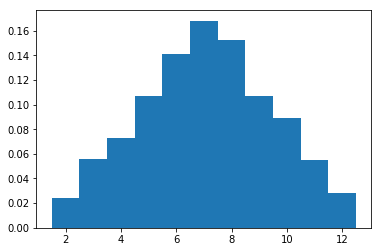

In [7]:
t2, bins2, mean2, stdev2 = multithrow(1000, 2)

print('mean:', mean2)
print('stdev:', stdev2)

plt.figure()
plt.hist(t2, bins2, density = True)
plt.show()

Mean for 2 Dice Set: 6.969
Standard Deviation for 2 Dice Set: 2.458462731057764
Mean for 3 Dice Set: 10.531
Standard Deviation for 3 Dice Set: 3.062848184288604
Mean for 4 Dice Set: 13.95
Standard Deviation for 4 Dice Set: 3.364446462644338
Mean for 5 Dice Set: 17.548
Standard Deviation for 5 Dice Set: 3.809422003401566
Mean for 10 Dice Set: 34.93
Standard Deviation for 10 Dice Set: 5.30387594123392


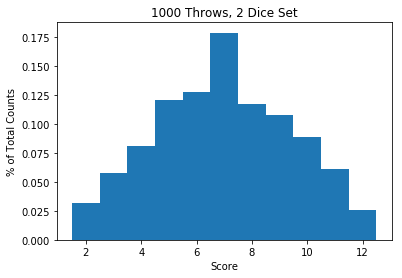

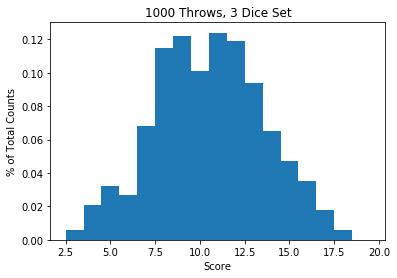

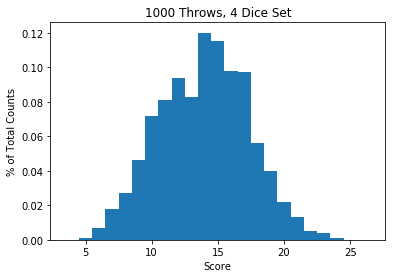

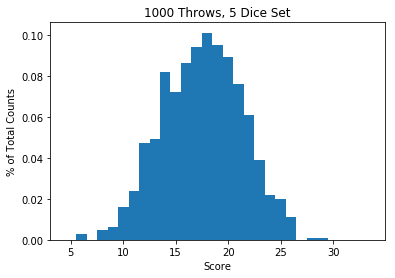

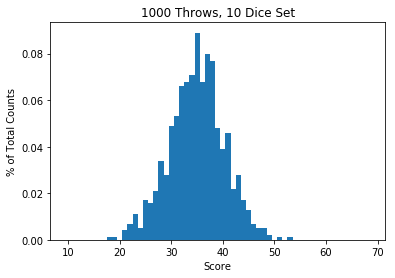

In [8]:
throws = 1000
Ns = [2,3,4,5,10]
for N in Ns:
    dist, bins, mean, stdev = multithrow(throws, N)
    titlestr = str(throws) + ' Throws, ' + str(N) + ' Dice Set'
    plt.figure()
    plt.title(titlestr)
    plt.hist(dist, bins, density=True)
    plt.xlabel('Score')
    plt.ylabel('% of Total Counts')
    
    meanstr = 'Mean for ' + str(N) + ' Dice Set:'
    stdstr = 'Standard Deviation for ' + str(N) + ' Dice Set:'
    print(meanstr, mean)
    print(stdstr, stdev)

plt.show()

In [9]:
multithrow(1000,5)[3]

3.8031511934184263

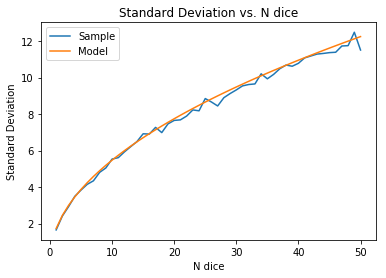

In [10]:
# Part 4
moreNs = np.arange(1,51)
stdevs = []
for N in moreNs:
    stdevs.append(multithrow(throws, N)[3])

plt.figure()
plt.title("Standard Deviation vs. N dice")
plt.plot(moreNs, stdevs, label = 'Sample') 
plt.plot(moreNs, (np.sqrt(3*moreNs)), label = 'Model')
plt.xlabel("N dice")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

By plotting the standard deviation as a function of the number of dice, it is shown that the standard deviation scales approximately to the square root of N dice (the model just has an eyeballed factor, but the point still stands). By definition, the sample standard deviation (or standard error) is equal to the standard deviation of the population divided by square root of the sample size. Thus, this graph also demonstrates the similarity to taking N-sized samples from a distribution of large N. To further show CLT, the distribution becomes more and more "normal-like" as N increases (part 3). Below, here is a very large N dice set to drive home the point.


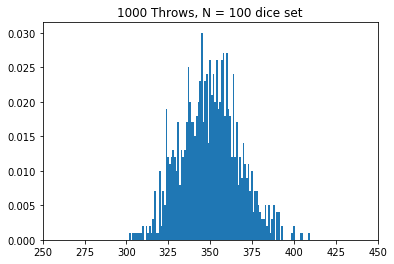

In [11]:
dist, bins, mean, stdev = multithrow(1000, N = 100)
plt.figure()
plt.title('1000 Throws, N = 100 dice set')
plt.hist(dist, bins, density = True)
plt.xlim(250,450)
plt.show()

# Problem 4

# Part 1

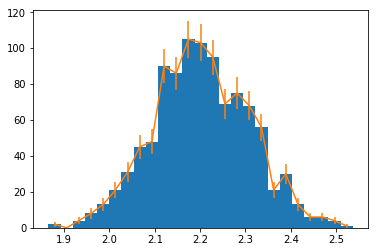

In [12]:
data = []
for line in open("peak.dat", 'r'):
    item = float(line.rstrip())
    data.append(item)

data = np.array(data)
#np.max(data)

bins = 25
counts, binEdges = np.histogram(data, bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
err = np.sqrt(counts)
#width = 0.05

plt.figure()
plt.hist(data, bins)
plt.errorbar(bincenters, counts, yerr = err)
plt.show()

In [13]:
# compute mean and std of distribution of energies, and their uncertainties
mean = np.mean(data)
std = np.std(data)

### "And their uncertainties??? What does that even mean"

# standard error of mean
SEM = std/np.sqrt(len(data))
stdeverr = std/np.sqrt(2*len(data))

print("Mean:", mean)
print("Standard Deviation:", std)
print('Standard error in the mean:', SEM)
print('Error in standard deviation:', stdeverr)

Mean: 2.203125234667
Standard Deviation: 0.10636126804020885
Standard error in the mean: 0.0033634386183073344
Error in standard deviation: 0.002378310255109828


# Part 3: Unbinned Fit 

In [14]:
def gaussian(x, peak, mu, sigma):
    # x = np.linspace(np.min(data),np.max(data), len(counts))
    return peak * np.exp( - (x - mu)**2 / (2 * sigma**2)) 

In [15]:
fittedmean, fittedstd = norm.fit(data)
print("Mean:", fittedmean)
print("Standard Deviation:", fittedstd)

print('Result: same exact results as np.mean and np.std from histogram') 

print('Same mean?', mean == fittedmean)
print('Same standard deviation:', std == fittedstd)

Mean: 2.203125234667
Standard Deviation: 0.10636126804020885
Result: same exact results as np.mean and np.std from histogram
Same mean? True
Same standard deviation: True


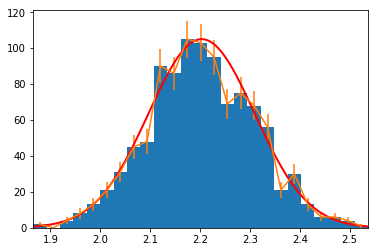

In [16]:
mu = fittedmean
sigma = fittedstd
plt.figure()
plt.hist(data, bins)
plt.errorbar(bincenters, counts, yerr = err)
x = np.linspace(np.min(data), np.max(data), 1000)
peak = np.max(counts)
plt.plot(x, gaussian(x, peak, mu, sigma), linewidth=2, color='r')
plt.xlim(np.min(data), np.max(data))
plt.show()

# Result: Curve fits the data well

# Part 4: Binned Fit

In [17]:
# Now, onto the binned least-squares fit Gaussian:

fitparams,hessian = curve_fit(gaussian, bincenters, counts)

### what does "their uncertainties" even refer to? This below is my assumption

paramserror = np.sqrt(np.diag(hessian))
print('Binned fit results:')
print('Error in peak value:', paramserror[0])
print('Mean error:', paramserror[1])
print('STD error:', paramserror[2])
print('For unbinned fit we have:')
print('Error in peak value:', np.sqrt(np.max(counts)))
print('Mean error:', SEM)
print('STD error:', SEM)

#fitparams

Binned fit results:
Error in peak value: 3.401158467861657
Mean error: 0.00422968327213465
STD error: 0.004233444122316887
For unbinned fit we have:
Error in peak value: 10.246950765959598
Mean error: 0.0033634386183073344
STD error: 0.0033634386183073344


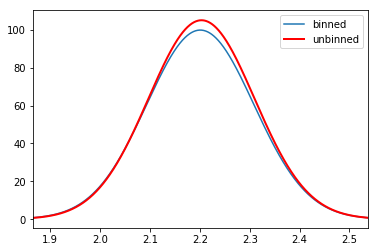

In [18]:
# Binned fit curve vs unbinned fit curve

plt.figure()
plt.plot(x, gaussian(x, fitparams[0], fitparams[1], fitparams[2]), label = 'binned')
plt.plot(x, gaussian(x, peak, mu, sigma), linewidth=2, color='r', label = 'unbinned')
plt.xlim(np.min(data), np.max(data))
plt.legend()
plt.show()


Binned fit only slightly differs from the unbinned fit, otherwise they're largely the same curve.

# Part 5: 
'Compare the histogram from 1 to the fitted curve, and compute a goodness of fit vlaue, such as chi squared'


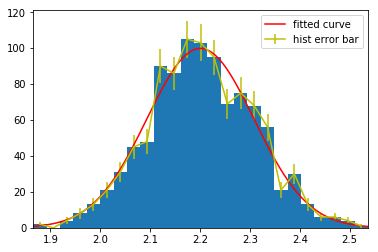

In [93]:

plt.figure()
plt.hist(data, bins)
plt.errorbar(bincenters, counts, yerr = err, label='hist error bar', color='y')
plt.plot(x, gaussian(x, fitparams[0], fitparams[1], fitparams[2]),
         label = 'fitted curve', color='r')
plt.xlim(np.min(data), np.max(data))
plt.legend()
plt.show()

In [99]:
comparisonvals = gaussian(bincenters, fitparams[0], fitparams[1], fitparams[2])
chisq, pval = stats.chisquare(counts, comparisonvals)

print('Chisq:', chisq)
print('P-value:', pval)
resultstr = 'The p-value is ' + str(pval)[0:5] + ', meaning that there is ' 
resultstr2 = str(pval*100)[0:5] + '% chance that data fits the Gaussian model.'
print((resultstr + resultstr2))


Chisq: 26.707486492634892
P-value: 0.318271509271051
The p-value is 0.318, meaning that there is 31.82% chance that data fits the Gaussian model.


Important note: more bins does not equate to having a higher p-value. When we tested with a smaller bin number (15), we got a pvalue of 0.91. This demonstrates the importance of picking a good bin size for your dataset, and not just 'the more the better'.

# Problem 5

In [5]:
currents = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2])
freqs = np.array([0.13,0.66,1.24,1.84,2.41,3.12,3.76,4.15,4.66,5.30,6.28,6.75]) 

mcurrent = np.mean(currents)
mfreq = np.mean(freqs)

# from the Gauss's formula, we can compute the slope m and the intercept

top = 0
bot = 0
for i in range(len(currents)):
    top += (currents[i] - mcurrent)*(freqs[i] - mfreq)
    bot += (currents[i] - mcurrent)**2

slope = top/bot
intercept = mfreq - slope*mcurrent
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 3.003146853146853
Intercept: 0.054871794871796276


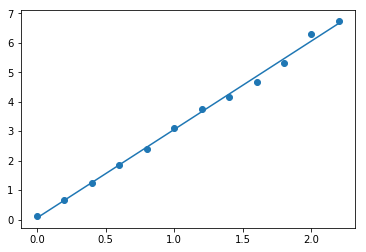

In [6]:
plt.figure()
plt.scatter(currents,freqs)
line = currents*slope + intercept
plt.plot(currents, line)
plt.show()

# Part 2: Chi squared

General form of chi squared: $\chi^2 = \sum_{i}^{N} (\frac{y_i - f(x_i)}{\sigma_i})^2$ 
Given $\sigma_i = 0.02$ and applying this formula, we have:

Reduced Chi squared =  38.97750582750584


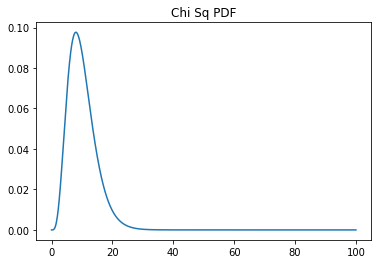

Integral value = Probability =  2.5619834092848565e-05


In [7]:

observed = freqs
model = line

# Using the formula above, then:
chi2 = 0
sigma = 0.02
for i in range(len(observed)):
    diff = observed[i] - model[i]
    chi2 += (diff/sigma)**2

# DoF = # datapoints - # parameters
df = len(currents) - 2
reducedchi2 = chi2/df
print('Reduced Chi squared = ', reducedchi2)

 
x = np.linspace(0,100,1000)
chi2dist = stats.chi2.pdf(x, df)

from scipy.integrate import quad
def chi_integrand(x, df):
    return stats.chi2.pdf(x,df)

def chi_int(lower_bound, df):
    return quad(chi_integrand, lower_bound, np.inf, args = (df))[0]

value = chi_int(reducedchi2, df)


plt.figure()
plt.title("Chi Sq PDF")
plt.plot(x, chi2dist)
plt.show()

# Intigrate from chi sq value to infinity to 
# find the probability corresponding to the chisq 
print('Integral value = Probability = ', value)

From above, we see that the probability that the observed slope fits the model incredibly small. From these results, we conclude that the model is incorrect (or at least one specific parameter). In this case, we can assume that our partner's measurement of $\sigma = 0.02$ is incorrect, but the general behavior between the current and frequency is probably still a line.

# Part 3
assume best fit line in part 1 is a good fit to the data. <br /> Estimate uncertainty in y, slope, and the intercept
y = a + bx format <br />

In [8]:
# uncertainty in y: best fit for reduced chisquare = 1 or that chisquare = df = 10
# rearrange the equation to solve for sigmay
reducedchi2 = 1
chi2 = df*reducedchi2
sumofdiffssq = 0
for i in range(len(freqs)):
    observed = freqs[i]
    expected = model[i]
    sumofdiffssq += (observed - expected)**2

# again, from the rearranged equation then:
sigmay = np.sqrt(sumofdiffssq/chi2)

print("The uncertainty in the measurements of y is therefore +/-", sigmay)



The uncertainty in the measurements of y is therefore +/- 0.12486393526956586


# Using Bevington textbook equations: <br />
$\Delta' = N\sum x_i^2 - (\sum x_i)^2$ (6.13) <br />
$\sigma^2 = \frac{1}{N-2} \sum (y_i - a - bx_i)^2$ (6.15) <br />
$\sigma_a^2 = \frac{\sigma^2}{\Delta'} \sum x_i^2 , \sigma_b^2 = N \frac{\sigma^2}{\Delta'}$ (6.23)

Where $\sigma_a$ and $\sigma_b$ are uncertainties of those respective parameters ($ y = a + bx $ in this case)

In [10]:
yab = 0
sumofsquares = 0
sums = 0

for i in range(len(currents)):
    sumofsquares += currents[i]**2
    sums += currents[i]
    yab += (freqs[i] - intercept - slope*currents[i])**2
    
delta = len(currents)*sumofsquares - (sums)**2
sigma2 = yab/(len(currents) - 2)

sigmaA =  np.sqrt((sigma2/delta) * sumofsquares)
sigmaB = np.sqrt(len(currents)* (sigma2/delta))

print(delta)
print(sigmaA)
print(sigmaB)

68.64000000000004
0.06780373766388542
0.0522082341036085


In [82]:
print("Result:")
slopestr = "Slope = " + str(slope) + " +/- " + str(sigmaB)
interceptstr = "Intercept = " + str(intercept) + " +/- " + str(sigmaA)
print(slopestr)
print(interceptstr)

Result:
Slope = 3.003146853146853 +/- 0.0522082341036085
Intercept = 0.054871794871796276 +/- 0.06780373766388542


# Part 4: Weighted fit
Assume uncertainty in each value grows with the function i.e. $\sigma(f) = 0.03 + 0.03*f$. <br />
Find slope and intercept of best-fit line using least squares w/ unequal weights.

In [83]:
sumweights = 0
sumweightscurrent = 0
sumweightsfreq = 0

for i in range(len(currents)):
    sigmaf = 0.03 + 0.03*freqs[i]
    weight = sigmaf**(-2)
    
    sumweights += weight
    sumweightscurrent += weight*currents[i]
    sumweightsfreq += weight*freqs[i]

wAvgCurrent = sumweightscurrent/sumweights
wAvgFreq = sumweightsfreq/sumweights

# print(wAvgCurrent)
# print(wAvgFreq)

# To get slope, another loop is required
numer = 0
denom = 0
for j in range(len(currents)):
    sigmaf = 0.03 + 0.03*freqs[j]
    weight = sigmaf**(-2)
    
    numer += weight*(currents[j] - wAvgCurrent)*(freqs[j] - wAvgFreq)
    denom += weight*((currents[j] - wAvgCurrent)**2)

wslope = numer/denom
wintercept = wAvgFreq - wslope*wAvgCurrent

print("Result:")
print("Unequal weighted, best-fit slope:", wslope)
print("Unequal weighted, best-fit intercept:", wintercept)

Result:
Unequal weighted, best-fit slope: 2.944382263634987
Unequal weighted, best-fit intercept: 0.10376908919371886
